### Practical Task:

* Created a decision tree that predicts the survival of passengers on the
Titanic. No restrictions imposed on the depth of the tree.
* Used the decision_tree_titanic.ipynb file provided, this has the
titanic.csv dataset loaded (sourced here) to complete the task.
* Selected relevant variables from the data and split the data into a training,
development, and test set.
* Trained a decision tree and made a plot of it.
* Computed model’s accuracy on the development set.
* Built model with different values of max_depth (2–10). At each step, created a plot of the tree and stored accuracies on both the training and development data.
* Plotted a line of training accuracies and another of the development accuracies in same graph. Written down shape of the lines and meaning of the shape.
* Reported the accuracy of final model on the test data.

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
# Import libraries

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# Split data into training and testing set after applying scaling


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor, AdaBoostRegressor

from sklearn import tree
from sklearn.model_selection import cross_validate
# Import Decision Tree classifier


from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error
# Used sklearn specific library to create confusion_matrix, accuracy score, recall_score and classification report

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call
# Import libraries for visualisation and plotting


%matplotlib inline
# Line of code to save and pan, as using Matplotlib to plot and render

In [36]:
titanic_df = pd.read_csv("titanic.csv")

titanic_df.head()
# Import, read and explore the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_df.info()
# Show total rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
# Chosen to drop Cabin, Name, Ticket and PassengerId columns, these are not required for creating decision tree

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Adding one-hot encoding to column "Sex"

In [39]:
titanic_df["Sex"].unique()
# Check unique values in "Sex" column.

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, converted it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [40]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], dtype=int)
titanic_df.head()
# Use array scaling, one hot encoding to add the additional relative columns individually
# by using create (n_catogries). 

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


Now, do the same to the "Embarked" column.

In [41]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"],  dtype=int)
titanic_df.head()
# Use array scaling, one hot encoding to add the additional relative columns individually
# used create (n_catogries) for column Embarked

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [42]:
titanic_df.info()
# Show updated total rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int32  
 7   Sex_male    891 non-null    int32  
 8   Embarked_C  891 non-null    int32  
 9   Embarked_Q  891 non-null    int32  
 10  Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 59.3 KB


In [43]:
titanic_df.isnull().sum()
# Identify any null values in the dataset

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [44]:
imputer = SimpleImputer(strategy='most_frequent')
titanic_df.loc[:,['Age']] = imputer.fit_transform(titanic_df[['Age']])
# Imputing for missing values in column 'Age', with sklearn simple imputer.

<Axes: >

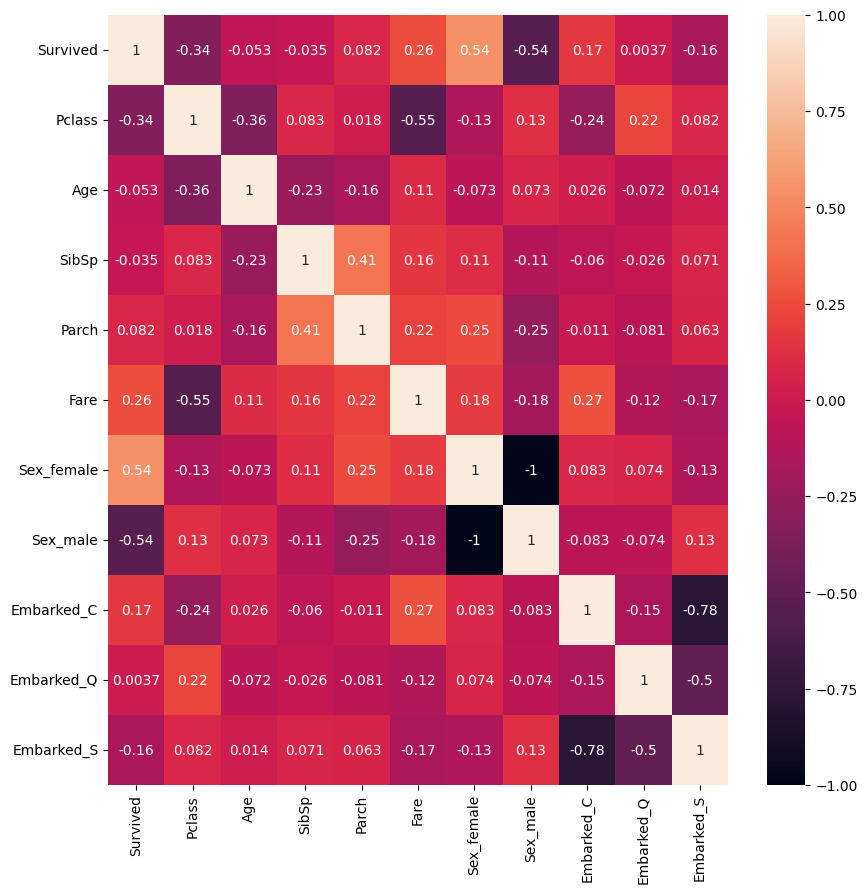

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.iloc[:,:].corr(), annot = True)

In [46]:
X = titanic_df.iloc[:, 1:]
y = titanic_df.iloc[:, 0]

In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Train Test Split

In [48]:
# Random state
r = 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= r)

X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=r)

### DecisionTreeClassifier

Check train and test accuracy

In [49]:
# Create a Decision Tree Classifier 
# Training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)

# Train the Decision Tree for test dataset
unpruned.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

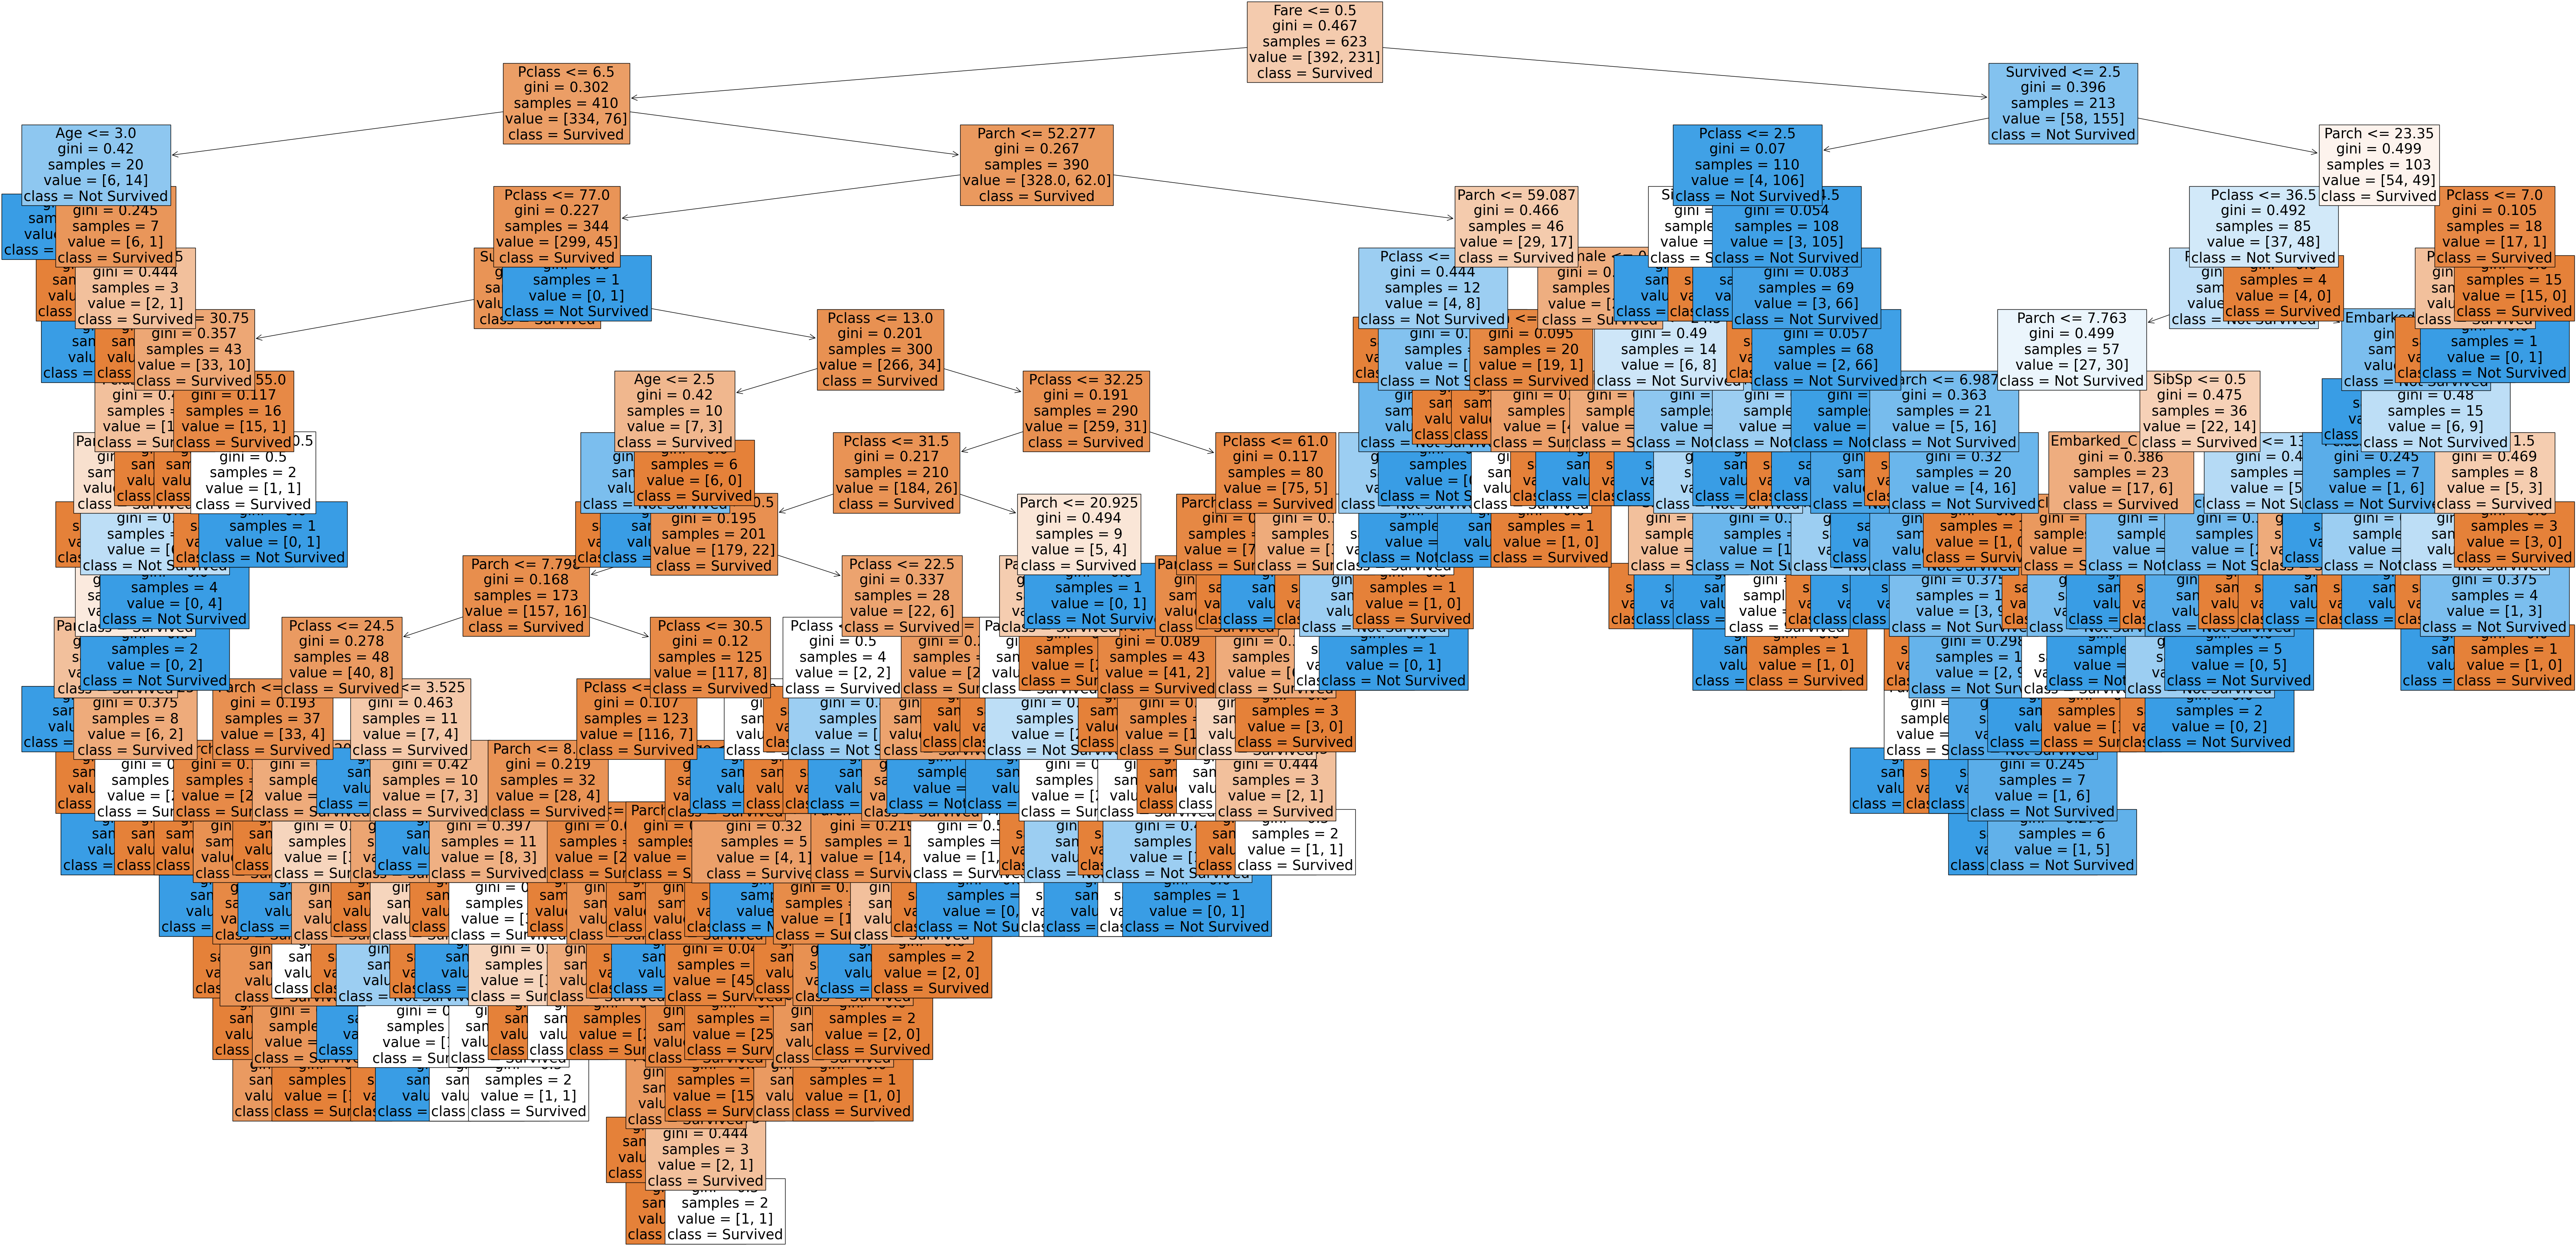

In [50]:
plt.figure(figsize=(80,40))
features = titanic_df.columns
classes = ['Survived', 'Not Survived']
tree.plot_tree(unpruned, feature_names=features, class_names=classes,filled=True, fontsize=25)
plt.show()
# Decision tree with no restriction imposed on depth of the tree

In [51]:
score = unpruned.score(X_dev, y_dev)
# Model's accuracy on development set dataset:

print('Accuracy: {}'.format(score))
print("At depth:", unpruned.tree_.max_depth)

Accuracy: 0.7611940298507462
At depth: 19


Text(0, 0.5, 'Accuracy')

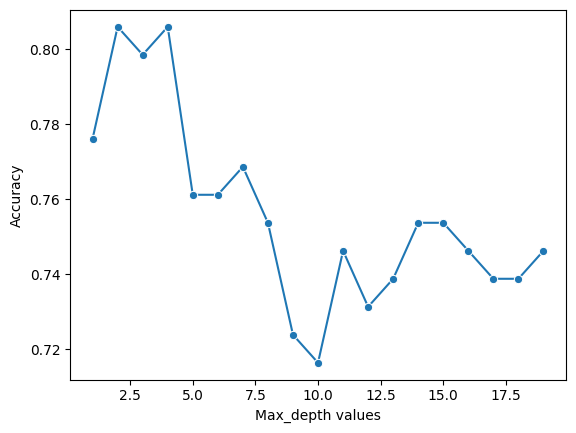

In [52]:
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=1)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

sns.lineplot(x=pruned_depths,y=pruned_scores, marker="o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
# looking at effect of max_depth pruning

In [53]:
trees = np.arange(2,10,1) # Computing for trees up to a tree depth of 10

solution = pd.DataFrame(index=trees, columns=['development accuracy', 'train accuracy'])
# Storing values of development and training accuracy

solution.index.name='tree depth'
solution = solution.fillna(0)

best_depth = None # Recording the best performing tree
best_accuracy = 0 # Recording the best validation accuracy

for i in trees:
    DT = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_validate(DT,X,y, cv=4,scoring=('accuracy'), return_train_score=True)
    training_accuracy = scores['train_score'].mean()
    development_accuracy = scores['test_score'].mean()
    solution.loc[i, 'train accuracy'] = training_accuracy
    solution.loc[i, 'development accuracy'] = development_accuracy
    if best_accuracy < development_accuracy:
        best_accuracy = development_accuracy
        best_DT = DT

C:\Users\User\AppData\Local\Temp\ipykernel_17272\3456204817.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  solution = solution.fillna(0)
C:\Users\User\AppData\Local\Temp\ipykernel_17272\3456204817.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7949879389203656' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  solution.loc[i, 'train accuracy'] = training_accuracy
C:\Users\User\AppData\Local\Temp\ipykernel_17272\3456204817.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7766735345210681' has dtype incompatible with int64, please explicitly cast to a 

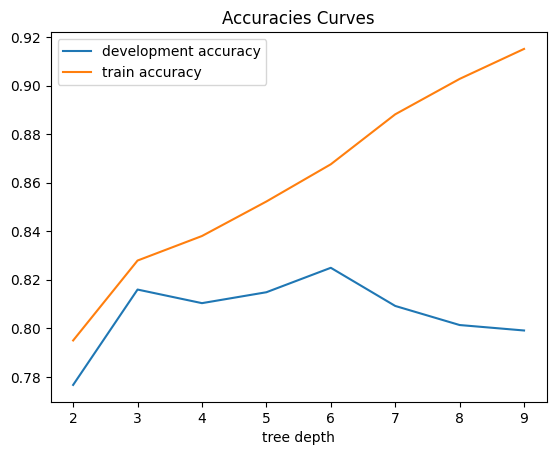

In [54]:

solution.plot()
plt.title('Accuracies Curves')
plt.show()
# Plotting accuracies for each tree depth

For the Decision Tree, there is a significant gap between training and development accuracy with tree depths over 3 and it grows beyond depth of 6. The training accuracy line is linear and development accuracy peaks at 6 depth.

In [55]:
# Create a Decision Tree Classifier and tree depth of 3
final_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree for test dataset
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [56]:
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Final_sec Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Final_sec Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Final_sec Training Accuracy: 0.8314606741573034
Final_sec Testing Accuracy: 0.7985074626865671
